##### This data set collected to explore the effect of foreign trade (exports, imports) and other economic features (like debt and foreign assets) on the GDP of Egypt


#####  Overview of the Columns:

* Date: The date of the observation (Querter data from 2005 to 2020).

* Exp_oil, Exp_food, Exp_cotton, etc.: Export values for different goods.

* Imp_oil, Imp_food, Imp_cotton, etc.: Import values for different goods.
* Totel_External_Debt: The total external debt.
* Net_Domestic_Debt: The net domestic debt.
* Government_Deposits: Deposits held by the government.
* Net_Foreign: Net foreign assets.
* GDP_mp: Gross Domestic Product at market prices.

# 1- Data Preprocessing

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
#Read the GDP data 
df=pd.read_csv('full_GDP_data.csv',index_col=0)
# Display the first few rows of the data to understand its structure 
df.head(5)

,Exp_oil,Exp_food,Exp_cotton,Exp_chemical,Exp_electric,Exp_metel,Exp_vehicles,Imp_oil,Imp_food,Imp_cotton,Imp_chemical,Imp_electric,Imp_metel,Imp_vehicles,Totel_External_Debt,Net_Domestic_Debt,Government_Deposits,Net_Foreign,GDP_mp
Date,,,,,,,,,,,,,,,,,,,
30/09/2005,2137.8,142.6,236.8,172.8,123.1,328.8,32.7,1152.8,758.3,184.9,473.8,429.9,568.6,321.5,29674.4,355094,85937,1947.0,153.5
31/12/2005,2594.2,136.6,226.6,144.7,33.5,318.4,50.1,1406.0,736.1,194.2,456.0,393.6,531.2,347.4,29691.6,357643,86364,1366.2,147.4
31/03/2006,2707.6,143.4,287.8,155.4,108.9,371.8,34.3,1189.1,723.2,208.2,365.9,371.2,444.1,427.4,28938.6,374034,86752,1318.3,153.3
30/06/2006,2782.8,164.7,266.2,224.2,60.3,453.8,44.5,1611.3,733.6,205.7,540.1,480.0,680.3,552.8,29592.6,387719,82135,1479.9,163.5
30/09/2006,2512.5,177.1,265.8,288.3,96.8,728.5,35.9,1396.4,973.2,257.4,552.7,472.0,783.6,431.5,28950.9,446634,83403,3237.1,185.9


# 2. Exploratory Data Analysis (EDA)


In [5]:
# Summary statistics
df.describe()

,Exp_oil,Exp_food,Exp_cotton,Exp_chemical,Exp_electric,Exp_metel,Exp_vehicles,Imp_oil,Imp_food,Imp_cotton,Imp_chemical,Imp_electric,Imp_metel,Imp_vehicles,Totel_External_Debt,Net_Domestic_Debt,Government_Deposits,Net_Foreign,GDP_mp
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.000000
mean,2579.520000,506.895000,471.520000,547.415000,296.833333,422.573333,152.255000,2425.265000,2271.935000,591.018333,1226.356667,1623.355000,1180.996667,1015.230000,51736.006667,1.580154e+06,251784.700000,1733.816667,527.890000
std,731.818455,309.152174,112.825862,170.194174,166.893479,142.375307,216.282535,833.469949,782.999254,213.993274,332.237925,765.532268,305.413505,355.351626,27332.197716,1.164773e+06,204155.835154,960.078121,289.015781
min,1084.100000,136.600000,226.600000,144.700000,33.500000,186.100000,32.700000,667.100000,723.200000,12.900000,365.900000,158.700000,444.100000,233.600000,28743.500000,3.550940e+05,65533.000000,-858.200000,147.400000
25%,2099.975000,283.500000,406.050000,471.525000,175.600000,324.725000,63.850000,1875.750000,1725.900000,453.750000,1134.000000,1190.850000,1049.050000,781.025000,32750.500000,5.600358e+05,101533.500000,1190.400000,271.950000
50%,2576.800000,407.900000,489.100000,565.600000,243.900000,394.650000,82.300000,2713.150000,2424.550000,636.850000,1309.400000,1458.650000,1188.450000,1054.250000,38604.100000,1.168904e+06,124131.000000,1677.650000,467.700000
75%,3037.225000,747.675000,552.925000,657.450000,455.100000,485.825000,163.150000,3020.200000,2768.025000,737.675000,1428.200000,2225.625000,1367.325000,1262.425000,61945.100000,2.451821e+06,400381.000000,2342.625000,839.300000
max,4552.400000,1509.300000,688.000000,886.600000,663.500000,795.300000,1284.700000,4003.600000,4324.300000,966.500000,1854.300000,3090.500000,1989.500000,1873.000000,123490.500000,4.361420e+06,744391.000000,4800.400000,1024.400000


In [12]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values.sum()

0

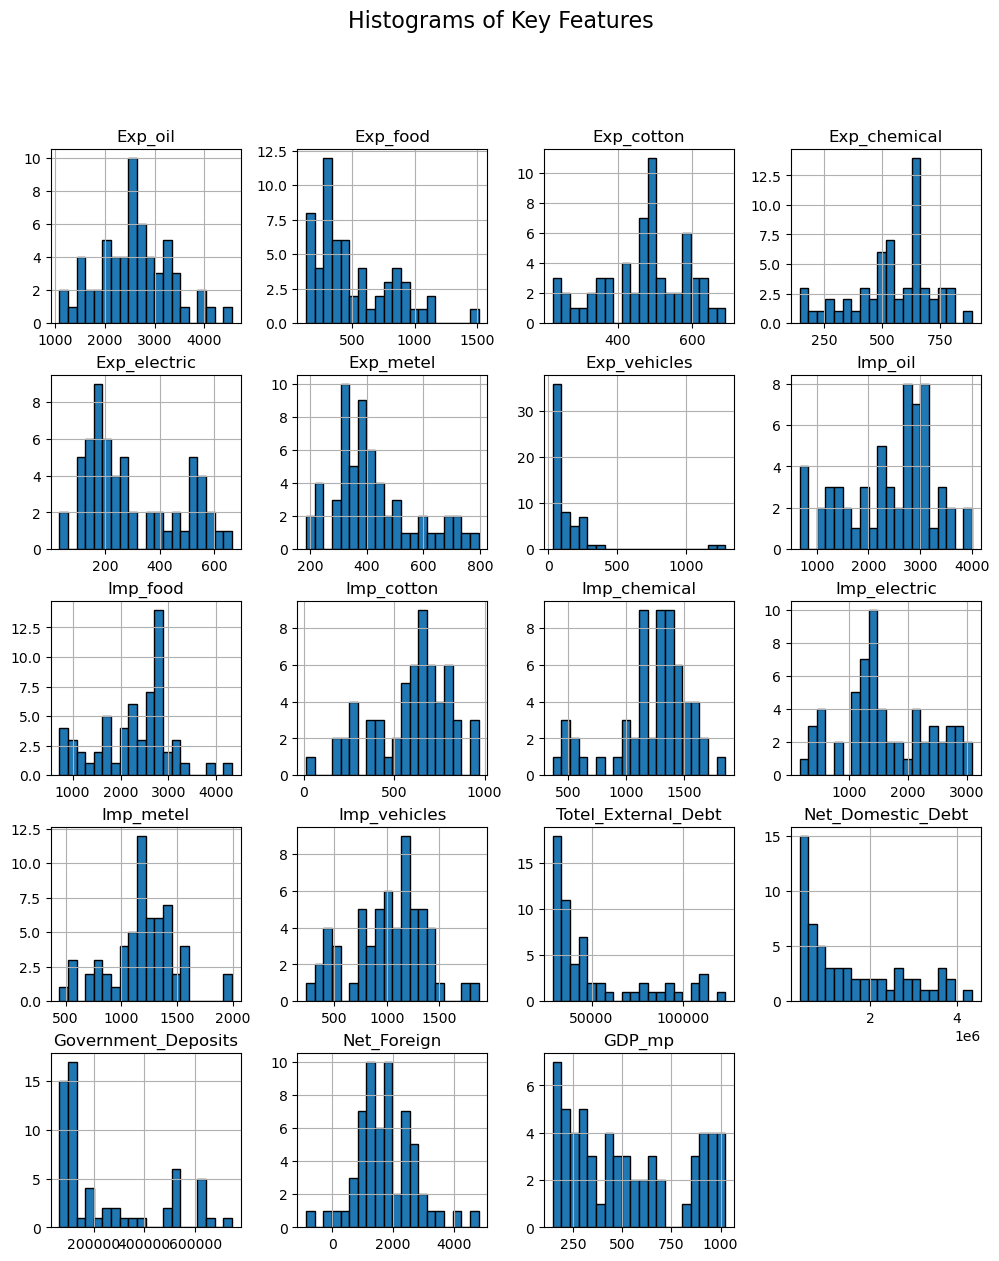

In [16]:
# Creating histograms for key variables to visualize distributions
df.hist(figsize=(12, 14), bins=20, edgecolor='black')
plt.suptitle('Histograms of Key Features', fontsize=16)
plt.show()

# 3-Time Series Analysis

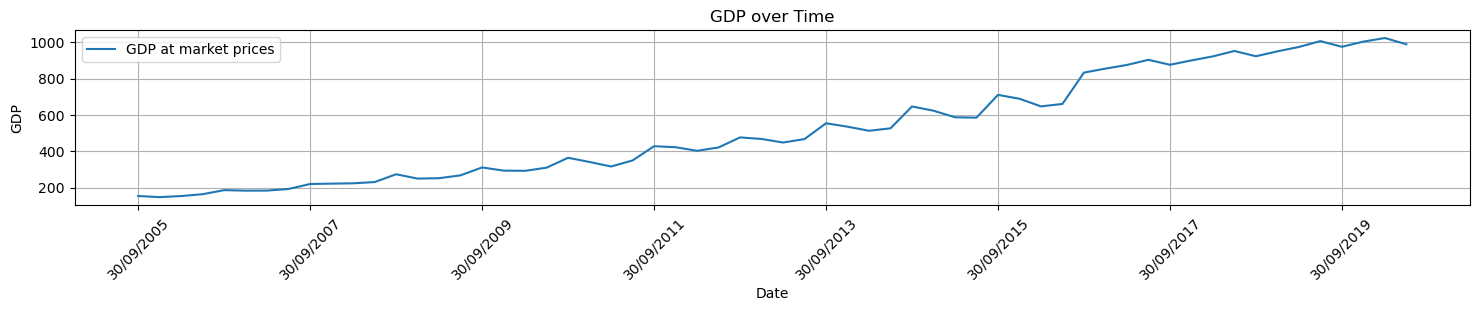

In [84]:

# Plot time-series data for key features: GDP and exports/imports
plt.figure(figsize=(18, 5))

# Plotting GDP over time
plt.subplot(2, 1, 1)
plt.plot(df.index, df['GDP_mp'], label='GDP at market prices')
plt.title('GDP over Time')
plt.xlabel('Date')
plt.ylabel('GDP')
# Reducing the number of date labels
plt.xticks(ticks=df.index[::8], rotation=45)  # Show every 8th date for clarity
plt.grid(True)
plt.legend()

plt.show()

The plot above shows the GDP (at market prices) over time
Here are a few observations :

**Trend Analysis**: The GDP appears to show an increasing trend over the time period covered in the data.
 
**Seasonal Patterns**: There might be some seasonal patterns or periodic fluctuations in the data that could be analyzed further

<Figure size 1500x1000 with 0 Axes>

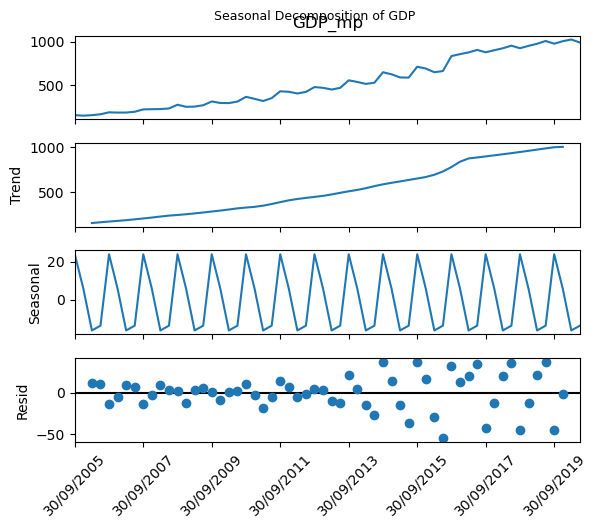

In [70]:
# Decompose the GDP time series to check for trends, seasonality, and noise
gdp_decompose = seasonal_decompose(df['GDP_mp'], model='additive', period=4)
plt.figure(figsize=(15, 10))
# Plot the seasonal decomposition
gdp_decompose.plot()
plt.suptitle('Seasonal Decomposition of GDP', fontsize=9)
# Reducing the number of date labels
plt.xticks(ticks=df.index[::8], rotation=45)  # Show every 8th date for clarity
plt.show()

### Explanation of the Seasonal Decomposition Plot for GDP:

The seasonal decomposition of the GDP time series breaks down the data into three main components:

1. **Trend**: 
   - The trend component shows the overall direction of the GDP data over time. In this case, the trend line demonstrates a general upward trajectory, indicating that GDP has been increasing steadily, despite some short-term fluctuations. This long-term growth suggests a strengthening economy over time.
   
2. **Seasonal**: 
   - The seasonal component captures regular, repeating patterns in the GDP data that occur at consistent intervals (in this case, quarterly). These patterns can arise due to seasonal factors like holidays, harvest periods, or industry-specific cycles. The seasonal plot reveals minor, regular oscillations that recur in the same periods each year. These fluctuations are relatively small, indicating that the seasonal effect on GDP is not dominant but still present.
   
3. **Residual (Noise)**: 
   - The residual component represents the "leftover" part of the data after removing the trend and seasonal effects. It captures the random, unpredictable variations that do not follow a specific pattern. In the residual plot, we see spikes and dips that may be due to unexpected events like global economic shocks, political changes, or market crises. These are the unpredictable fluctuations that could not be explained by either trend or seasonality.

### Key Insights:
- **Long-Term Growth**: The upward trend indicates that the GDP has generally increased over time, pointing to positive economic growth.
  
- **Seasonal Effects**: The seasonal component shows that GDP is influenced by repeating, predictable patterns throughout the year, although these effects appear minor compared to the overall trend.

- **Unpredictable Variations**: The residual (noise) plot highlights that some GDP variations are driven by external, random factors that are not part of the regular seasonal or trend patterns.

### Conclusion:
Understanding these components allows us to separate the systematic behavior (trend and seasonality) from irregular, one-off events (residual). This is valuable for forecasting future GDP by accounting for recurring seasonal effects and long-term trends, while leaving out the unpredictable noise.


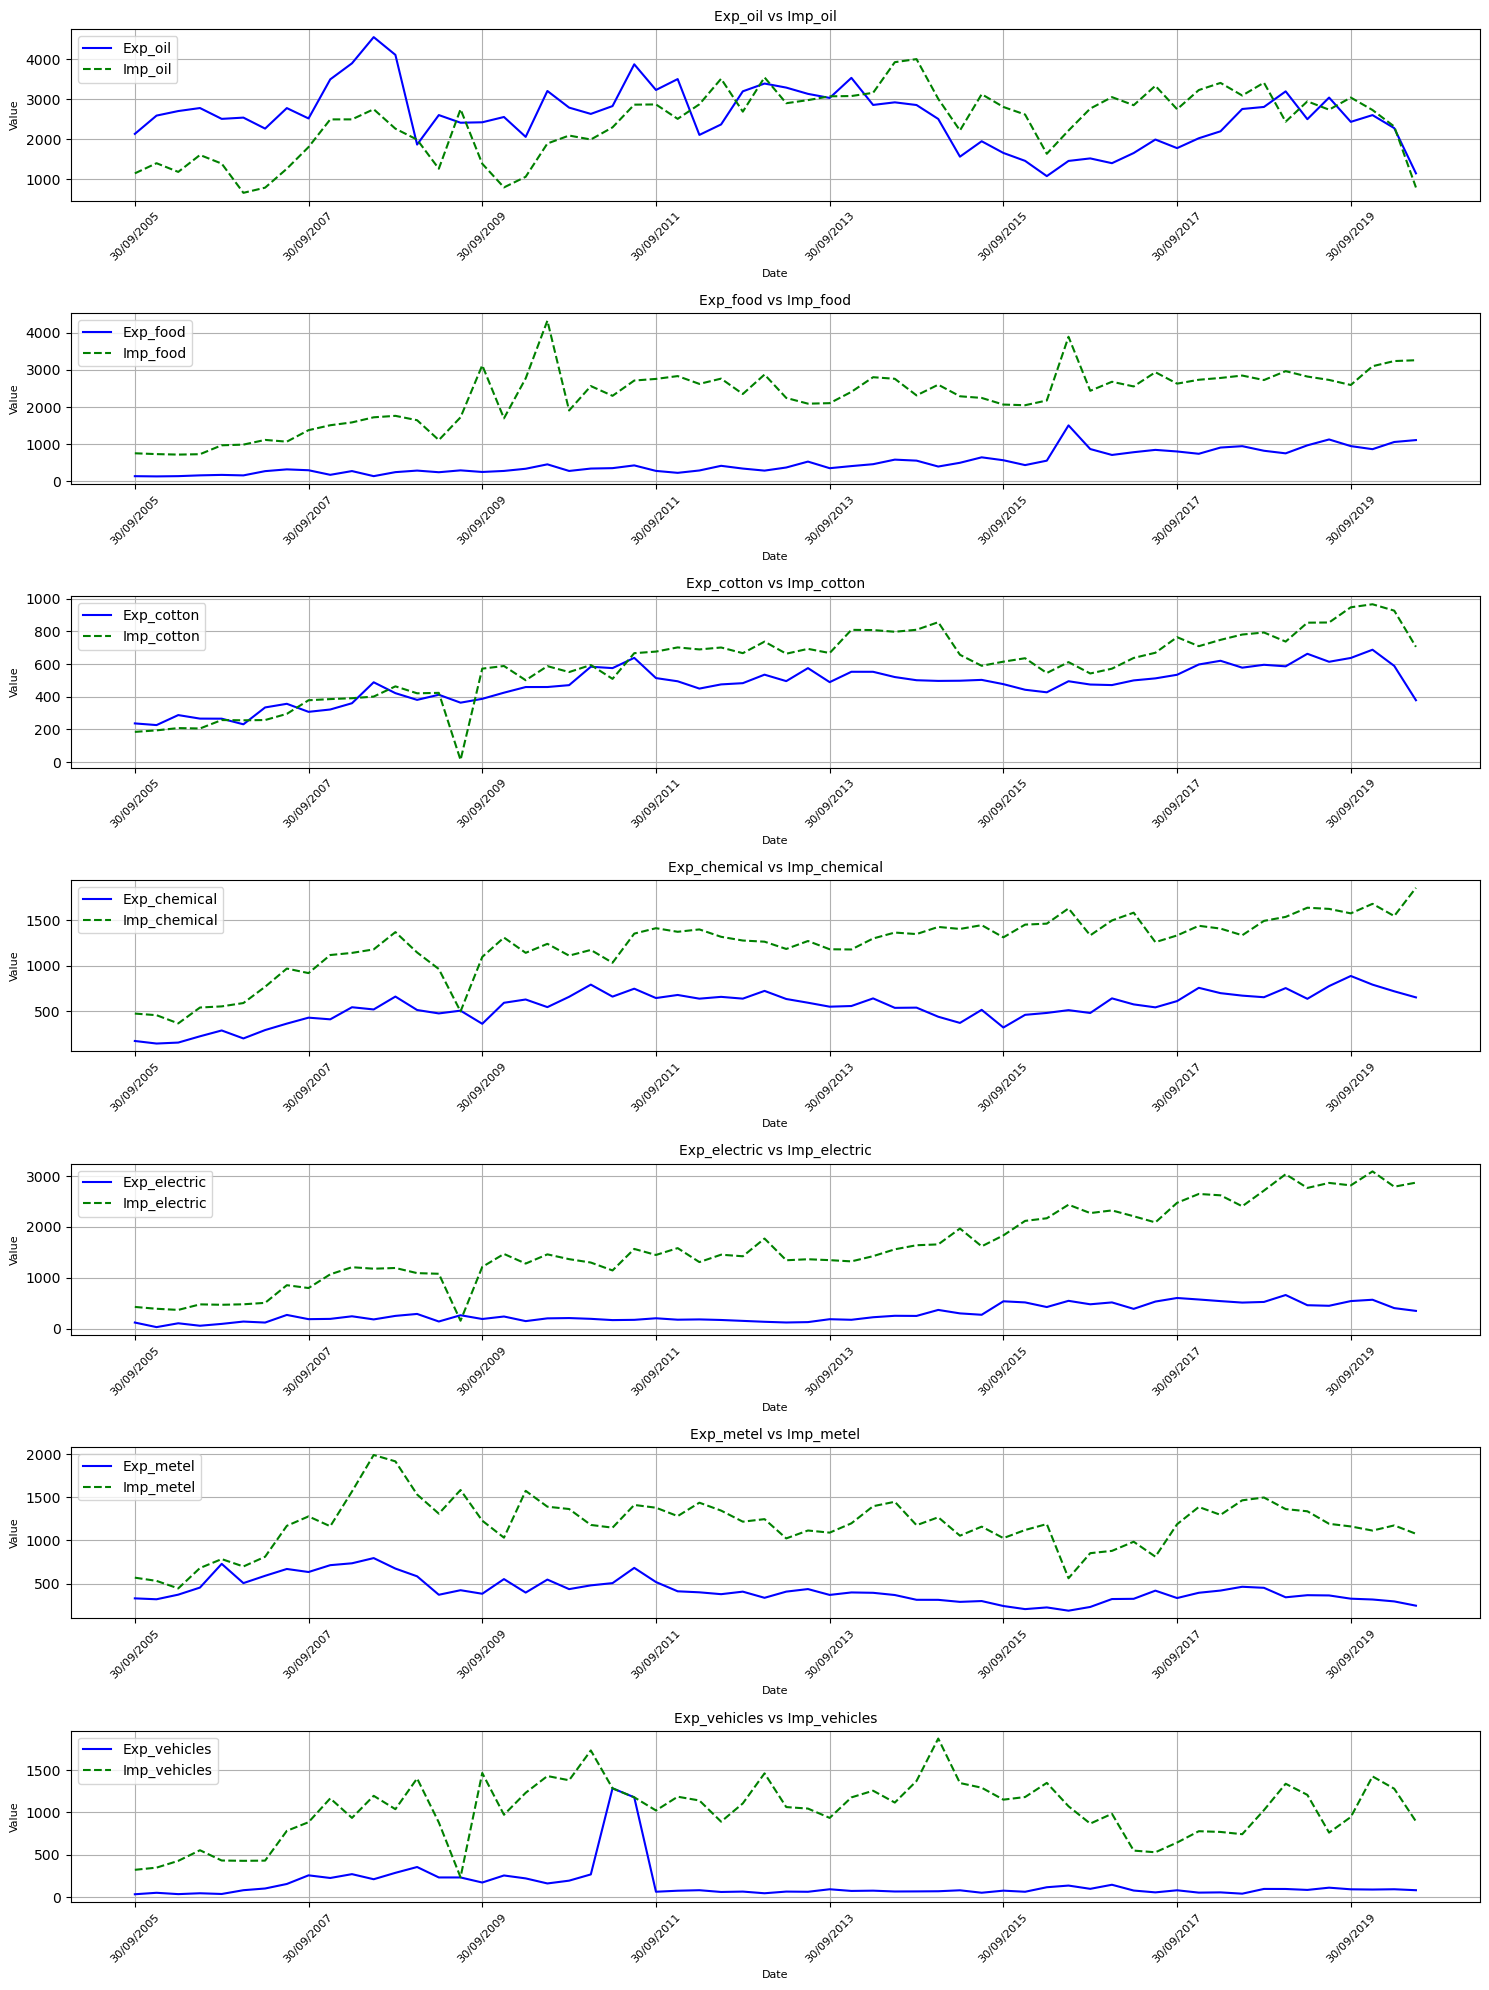

In [65]:
# To plot each pair of export and import values on one plot, we can loop through the corresponding pairs

# List of export and import columns
export_columns = [col for col in df.columns if col.startswith('Exp')]
import_columns = [col.replace('Exp', 'Imp') for col in export_columns]
#plot all export-import pairs with legends placed consistently on the left side

plt.figure(figsize=(15, 20))

# Plot each pair of export and import values, ensuring consistent left-side legend placement
for i, (exp, imp) in enumerate(zip(export_columns, import_columns), start=1):
    plt.subplot(len(export_columns), 1, i)
    plt.plot(df.index, df[exp], label=f'{exp}', linestyle='-', color='blue')
    plt.plot(df.index, df[imp], label=f'{imp}', linestyle='--', color='green')
    plt.title(f'{exp} vs {imp}', fontsize=10)
    plt.xlabel('Date', fontsize=8)
    plt.ylabel('Value', fontsize=8)
    
    # Reduce the number of date labels shown
    plt.xticks(ticks=df.index[::8], rotation=45, fontsize=8)
    
    # Position legend on the left side
    plt.legend(loc='upper left')
    plt.grid(True)

plt.tight_layout()
plt.show()



* Each subplot in the visualization compares a specific export category with its corresponding import category over time. The dashed line represents exports, while the dotted line represents imports. Here's a breakdown of what each subplot tells us:

1- **Export vs Import Trends**: The plots show how both exports and imports have changed over time for different commodities (e.g., oil, food, cotton). Some key trends:

2- **Oil**: We can see that oil exports and imports vary significantly over time. There are periods where imports are higher than exports, indicating a trade imbalance, while other periods show the opposite.

3- **Food**: Similar patterns can be observed in food exports and imports, though imports seem to dominate more consistently over time, reflecting reliance on foreign food sources.

4- **Other Commodities (Cotton, Chemical, Electric goods, Metals, Vehicles)**: Each of these pairs shows a unique relationship between exports and imports, with periods of surpluses and deficits depending on global trade and internal demand/supply factors.

##### Trade Balance Insight:

* When exports are consistently higher than imports, it indicates a trade surplus for that commodity. This can contribute positively to GDP.

* When imports exceed exports, it shows a trade deficit, which may negatively impact GDP if it persists over time.
Fluctuations:

* The fluctuations seen in many plots reflect external factors, such as global market prices, geopolitical events, or domestic production changes. For example, periods of high oil imports could coincide with increased demand or lower domestic production.

###### Key Observations:

6- **Oil**: There is significant volatility in both imports and exports, but no clear long-term balance.

7- **Food**: Imports consistently exceed exports, suggesting a strong reliance on foreign food sources.

8- **Cotton and Chemicals**: Some exports show strong growth at certain points, potentially driven by favorable market conditions or improved production.

##### Insights for Interpretation:

* Understanding these relationships is crucial for assessing trade policy and economic performance. For instance, persistent trade deficits in essential commodities might signal areas where domestic production should be boosted, while export surpluses can strengthen GDP.

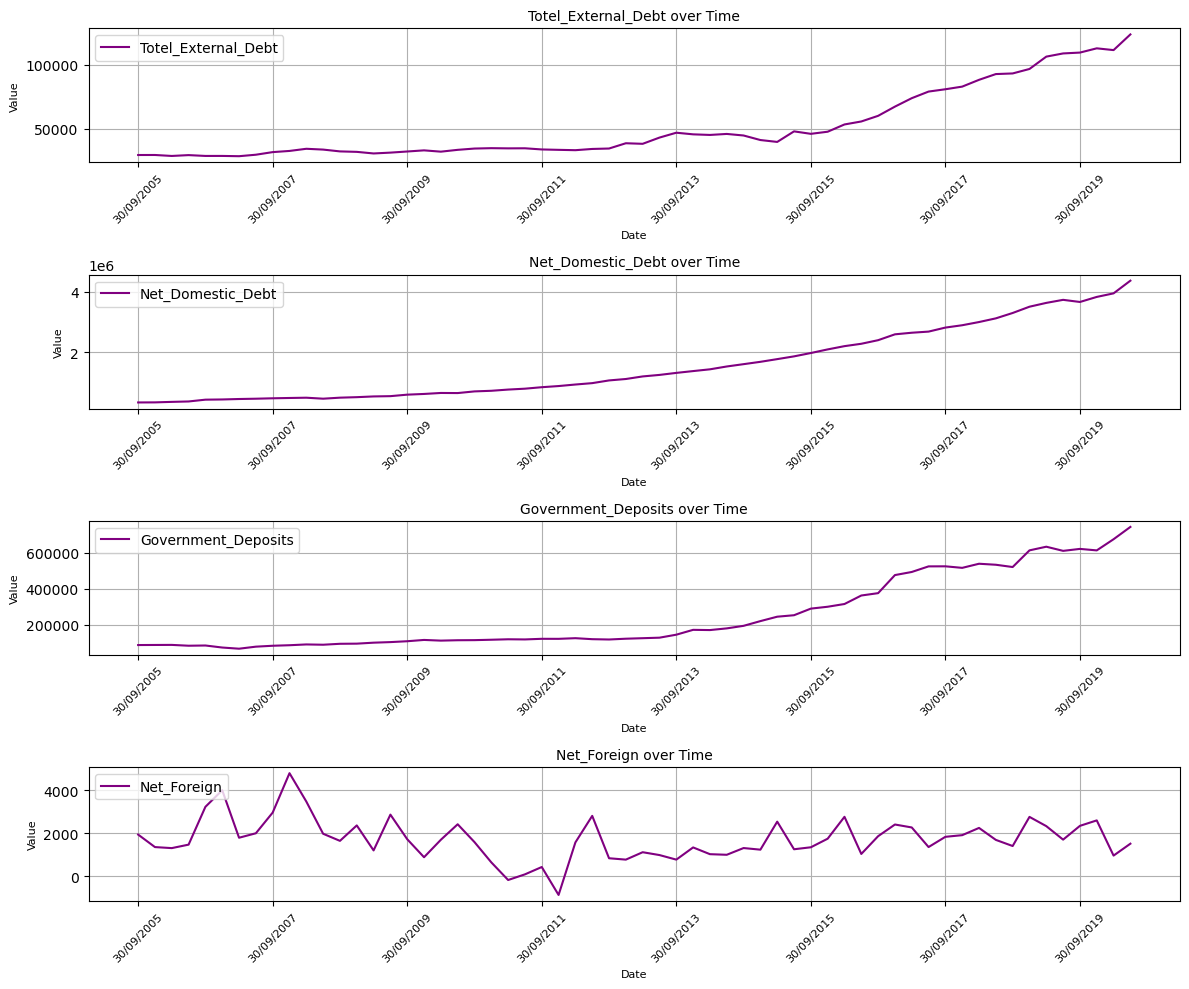

In [68]:
# Plotting the remaining features in the dataset that are not exports or imports

# List of columns to exclude (all export and import columns)
columns_to_exclude = export_columns + import_columns + ['Date']+['GDP_mp']

# Extract the remaining feature columns
remaining_features = [col for col in df.columns if col not in columns_to_exclude]

# Plot each remaining feature
plt.figure(figsize=(12, 10))

for i, feature in enumerate(remaining_features, start=1):
    plt.subplot(len(remaining_features), 1, i)
    plt.plot(df.index, df[feature], label=feature, color='purple')
    plt.title(f'{feature} over Time', fontsize=10)
    plt.xlabel('Date', fontsize=8)
    plt.ylabel('Value', fontsize=8)
    
    # Reduce the number of date labels shown
    plt.xticks(ticks=df.index[::8], rotation=45, fontsize=8)
    
    plt.legend(loc='upper left')
    plt.grid(True)

plt.tight_layout()
plt.show()


These plots represent the economic indicators in the dataset that are **not** directly related to exports or imports. Each subplot shows how a particular feature evolves over time. Here’s a breakdown of each feature:

1. **Totel_External_Debt**: 
   - This shows the total external debt of the country. Over time, we can observe fluctuations, with noticeable increases in some periods. This reflects how the country's debt has grown or been reduced, often influenced by international loans or repayment schedules.
   
2. **Net_Domestic_Debt**: 
   - This tracks the domestic debt held by the government. The general trend indicates a continuous increase, which could be a sign that the government is borrowing more from internal sources, potentially to fund public projects or cover budget deficits.
   
3. **Government_Deposits**: 
   - This feature shows the deposits held by the government in financial institutions. Fluctuations could represent government savings, investment activities, or temporary cash flow changes. It may decrease when the government needs liquidity and increase when surplus funds are available.
   
4. **Net_Foreign**: 
   - This represents net foreign assets, indicating the country's balance between foreign assets and liabilities. A positive value suggests the country holds more foreign assets than liabilities, contributing to economic stability. Negative values would indicate more liabilities.
   
5. **GDP_mp**: 
   - This is the GDP at market prices, an essential indicator of economic health. We see a general upward trend with periodic fluctuations, reflecting periods of economic growth, recessions, or other economic shocks. Changes in GDP can be linked to factors like trade balances, government debt, and foreign investments.

### General Observations:
- **Debt Trends**: Both external and domestic debts show varying patterns, but domestic debt seems to be increasing at a faster and more consistent pace. This could imply higher reliance on internal borrowing.
  
- **Government Deposits**: Periods where deposits drop could be linked to increased government spending, while rises may indicate surplus periods.

- **Economic Growth**: The GDP subplot demonstrates how the economy has been growing over time, despite some temporary downturns. This growth might be associated with various factors like debt, foreign trade, or government investments.

### Insights:
- **Economic Health**: Tracking these metrics is crucial for understanding a country's economic health. For instance, a growing GDP alongside rising domestic debt suggests the government might be borrowing internally to fuel growth.
  
- **Debt Management**: The interplay between external and domestic debt can provide insights into how the country manages its finances—whether it's relying more on foreign loans or domestic resources.


#### the corrolation between GDP and featuers

In [71]:
# Define export and import columns
export_columns = ['Exp_oil', 'Exp_food', 'Exp_cotton', 'Exp_chemical', 'Exp_electric', 'Exp_metel', 'Exp_vehicles']
import_columns = ['Imp_oil', 'Imp_food', 'Imp_cotton', 'Imp_chemical', 'Imp_electric', 'Imp_metel', 'Imp_vehicles']
other_columns = ['Totel_External_Debt', 'Net_Domestic_Debt', 'Government_Deposits', 'Net_Foreign']

# Select the export, import columns and GDP
exports_imports_gdp = df[export_columns + import_columns +other_columns+ ['GDP_mp']]

# Calculate the correlation matrix
correlation_matrix_all = exports_imports_gdp.corr()

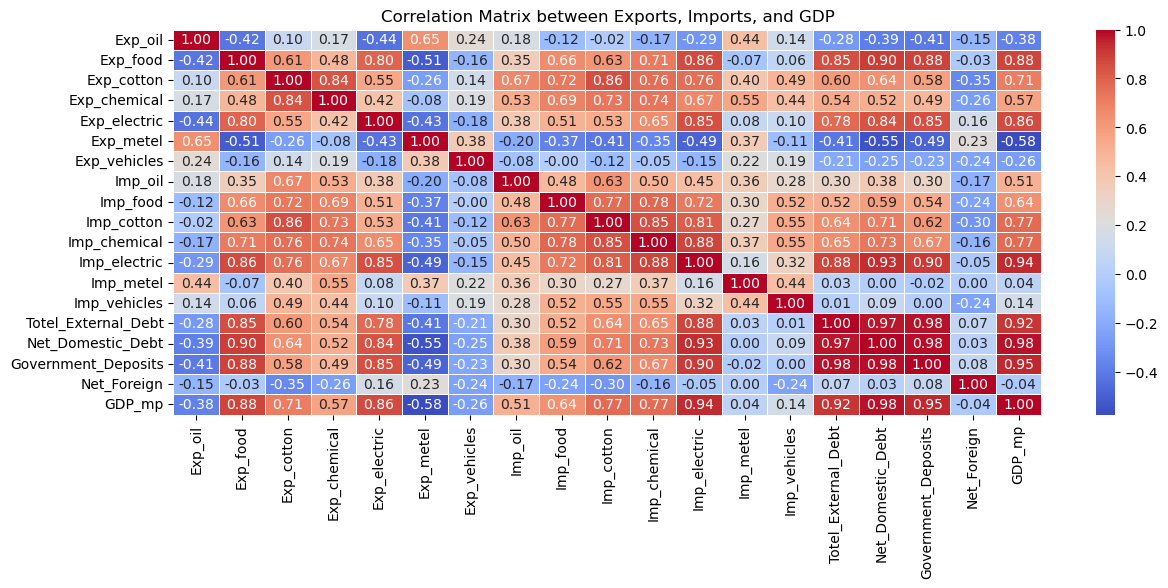

In [72]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Exports, Imports, and GDP')
plt.show()

In [73]:
# Display the correlations of GDP with exports and imports
cor_matrix2 = correlation_matrix_all['GDP_mp']
cor_matrix2 = cor_matrix2.to_frame()
cor_matrix2.style.background_gradient(cmap='coolwarm')

,GDP_mp
Exp_oil,-0.377255
Exp_food,0.879919
Exp_cotton,0.709009
Exp_chemical,0.567843
Exp_electric,0.859516
Exp_metel,-0.575252
Exp_vehicles,-0.255875
Imp_oil,0.512183
Imp_food,0.640127
Imp_cotton,0.768057


### The above chart show that :
    
##### There ara a strong Positive Correlation with GDP:

1-**Exports**:
* Food, electric goods, and cotton exports have strong positive correlations with GDP,
* indicating that increases in these exports are associated with higher GDP.

2-**Imports**:
*Electric goods, chemicals, cotton, and food imports show strong positive correlations with GDP, suggesting that higher imports in these categories are associated with higher GDP.

3-**Economic featuers**: 
Totel_External_Debt , Net_Domestic_Debt , Government_Deposits

    
##### Moderate Positive Correlation with GDP:

1-**Exports**: Chemical exports have a moderate positive correlation with GDP.

2-**Imports**: Oil imports have a moderate positive correlation with GDP.
    
##### Negative Correlation with GDP:

1-**Exports**:
Oil, metal,and vehicle exports have negative correlations with GDP, indicating an inverse relationship where 
increases in these exports are associated with lower GDP.

2-**Economic featuers**:
Net_Foreign

    
##### Weak Correlation with GDP:

1-**Imports**: Metal and vehicle imports have weak positive correlations with GDP, indicating a relatively small impact on GDP.